In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

In [356]:
#Check first 5 rows of train df
pd.set_option("display.max_columns", 81)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [357]:
#check first 5 rows of test df
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [358]:
#Check train and test set shape
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


In [359]:
train.dtypes.head()

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
dtype: object

In [360]:
test.dtypes.head()

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
dtype: object

In [361]:
#Sort by null values to prioritize columns to clean/figure out what to do with null values
train.isnull().sum().sort_values(ascending = False).head()

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
dtype: int64

In [362]:
test.isnull().sum().sort_values(ascending = False).head()

Pool QC         875
Misc Feature    838
Alley           821
Fence           707
Fireplace Qu    422
dtype: int64

In [363]:
#Cleaning/Feature Engineering

In [364]:
#Use for loop to check null values against related columns to figure out how to address nulls.
columns = [col for col in train if "Bsmt" in col]
check_df = train[columns]
check_df[check_df["Total Bsmt SF"].isnull()]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
#For loop to replace null values within fillnan_0 list with 0
fillnan_0 = ["Lot Frontage", "Mas Vnr Area","Bsmt Unf SF", "BsmtFin SF 2", "Total Bsmt SF",
             "BsmtFin SF 1", "Bsmt Half Bath", "Bsmt Full Bath","Garage Cars","Garage Area"]
for col in fillnan_0:
    train[col] = train[col].fillna(value=0)
    test[col] = test[col].fillna(value=0)

In [366]:
#Check relationship between Garage Yr Blt and Year Built.
train[["Garage Yr Blt", "Year Built"]].head()

,Garage Yr Blt,Year Built
0,1976.0,1976
1,1997.0,1996
2,1953.0,1953
3,2007.0,2006
4,1957.0,1900


In [367]:
#Since a lot of the values are the same, I decided it would be best to replace nulls in Garage Yr Blt with Year Built years.
train["Garage Yr Blt"] = train["Garage Yr Blt"].fillna(train["Year Built"])
test["Garage Yr Blt"] = test["Garage Yr Blt"].fillna(train["Year Built"])

In [368]:
#check to see if the replace was done properly.
train["Garage Yr Blt"].loc[3]

2007.0

In [369]:
#Categorical variables to dummy
dummies = ["Alley", "MS SubClass", "MS Zoning", "Street", "Lot Shape", "Land Contour",
           "Utilities", "Lot Config", "Land Slope", "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", 
          "House Style", "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Foundation", 
          "Heating", "Central Air", "Electrical", "Garage Type", "Garage Finish", "Paved Drive", "Fence", 
           "Misc Feature", "Sale Type", "Functional", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2","Mas Vnr Type",
          "Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Heating QC", "Kitchen Qual", "Fireplace Qu", "Garage Qual",
           "Garage Cond", "Pool QC"]

In [370]:
#Shout out to Riley Dallas
#For loop to add all unique categories (train vs. test) to each column to prevent mismatched columns after dummying variables.
for col in dummies:
    train[col] = train[col].fillna("NA")
    test[col] = test[col].fillna("NA")
    train_vals = list(train[col].unique())
    test_vals = list(test[col].unique())
    total_vals = set(train_vals + test_vals)
    train[col] = pd.Categorical(train[col], categories = total_vals)
    test[col] = pd.Categorical(test[col], categories = total_vals)

In [371]:
#Create dummy variables for variables in dummies list
train = pd.get_dummies(train, columns = dummies)
test = pd.get_dummies(test, columns = dummies)

In [372]:
train.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Alley_NA,Alley_Pave,...,Bsmt Qual_Po,Bsmt Cond_NA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_TA,Bsmt Cond_Gd,Bsmt Cond_Po,Heating QC_Ex,Heating QC_Fa,Heating QC_TA,Heating QC_Gd,Heating QC_Po,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_TA,Kitchen Qual_Gd,Kitchen Qual_Po,Fireplace Qu_NA,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_TA,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Qual_NA,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_TA,Garage Qual_Gd,Garage Qual_Po,Garage Cond_NA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_TA,Garage Cond_Gd,Garage Cond_Po,Pool QC_NA,Pool QC_Ex,Pool QC_Fa,Pool QC_TA,Pool QC_Gd
0,109,533352170,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,544,531379050,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,153,535304180,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,318,916386060,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,1,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,255,906425045,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [373]:
test.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Alley_NA,Alley_Pave,Alley_Grvl,...,Bsmt Qual_Po,Bsmt Cond_NA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_TA,Bsmt Cond_Gd,Bsmt Cond_Po,Heating QC_Ex,Heating QC_Fa,Heating QC_TA,Heating QC_Gd,Heating QC_Po,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_TA,Kitchen Qual_Gd,Kitchen Qual_Po,Fireplace Qu_NA,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_TA,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Qual_NA,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_TA,Garage Qual_Gd,Garage Qual_Po,Garage Cond_NA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_TA,Garage Cond_Gd,Garage Cond_Po,Pool QC_NA,Pool QC_Ex,Pool QC_Fa,Pool QC_TA,Pool QC_Gd
0,2658,902301120,69.0,9142,6,8,1910,1950,0.0,0.0,0.0,1020.0,1020.0,908,1020,0,1928,0.0,0.0,2,0,4,2,9,0,1910.0,1.0,440.0,0,60,112,0,0,0,0,4,2006,0,0,1,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,2718,905108090,0.0,9662,5,4,1977,1977,0.0,0.0,0.0,1967.0,1967.0,1967,0,0,1967,0.0,0.0,2,0,6,2,10,0,1977.0,2.0,580.0,170,0,0,0,0,0,0,8,2006,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2414,528218130,58.0,17104,7,5,2006,2006,0.0,554.0,0.0,100.0,654.0,664,832,0,1496,1.0,0.0,2,1,3,1,7,1,2006.0,2.0,426.0,100,24,0,0,0,0,0,9,2006,1,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1989,902207150,60.0,8520,5,6,1923,2006,0.0,0.0,0.0,968.0,968.0,968,0,0,968,0.0,0.0,1,0,2,1,5,0,1935.0,2.0,480.0,0,0,184,0,0,0,0,7,2007,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,625,535105100,0.0,9500,6,5,1963,1963,247.0,609.0,0.0,785.0,1394.0,1394,0,0,1394,1.0,0.0,1,1,3,1,6,2,1963.0,2.0,514.0,0,76,0,0,185,0,0,7,2009,1,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [374]:
train.isnull().sum().sort_values(ascending = False).head()

Pool QC_Gd              0
Condition 1_Norm        0
Neighborhood_ClearCr    0
Neighborhood_Somerst    0
Neighborhood_BrkSide    0
dtype: int64

In [375]:
test.isnull().sum().sort_values(ascending = False).head()

Pool QC_Gd              0
Condition 1_Norm        0
Neighborhood_ClearCr    0
Neighborhood_Somerst    0
Neighborhood_BrkSide    0
dtype: int64

In [290]:
#Check to see if columns are mismatched. Train will have 1 additional column for SalePrice
print(train.shape)
print(test.shape)

(2051, 338)
(879, 337)


In [291]:
#Quick EDA

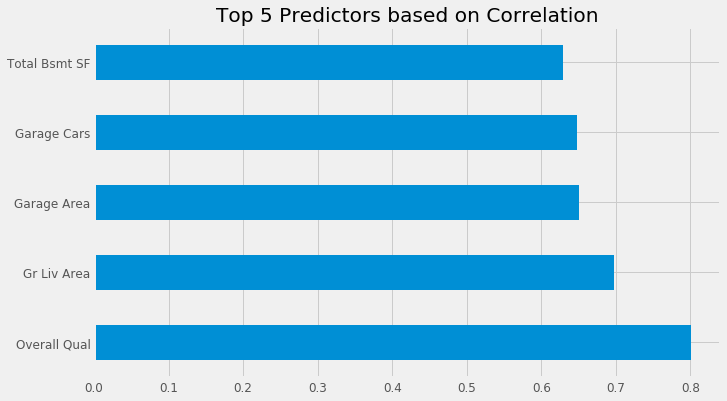

In [292]:
plt.style.use('fivethirtyeight')
corr_df1 = pd.DataFrame(train.corr().loc["SalePrice", :].abs().sort_values(ascending = False))
corr_df1[1:6].plot(kind = "barh", legend = False, title = "Top 5 Predictors based on Correlation", figsize = (10,6),
                 fontsize = 12)


In [293]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [294]:
#Features Selection/Modeling

Model 1 - Lasso Regularization. Kaggle RSME - 37639.09141

In [295]:
#Set X and y for train data set; Perform train/test split
features = [col for col in train if col != "SalePrice"]
X = train[features]
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [296]:
#Lasso Regularization requires features in X to be scaled
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [297]:
#Instantiate LassoCV and fit model against scaled train set (within train data set)
lasso = LassoCV(max_iter = 10000)
lasso.fit(X_scaled_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [298]:
#Get CrossVal Score off scaled train set (within train data set)
lasso_cross = cross_val_score(lasso, X_scaled_train, y_train)
print(lasso_cross.mean())

0.8832105653604984


In [299]:
print(lasso_cross)

[0.89657544 0.91874629 0.83430997]


In [300]:
X_train.columns

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       ...
       'Garage Cond_Ex', 'Garage Cond_Fa', 'Garage Cond_TA', 'Garage Cond_Gd',
       'Garage Cond_Po', 'Pool QC_NA', 'Pool QC_Ex', 'Pool QC_Fa',
       'Pool QC_TA', 'Pool QC_Gd'],
      dtype='object', length=349)

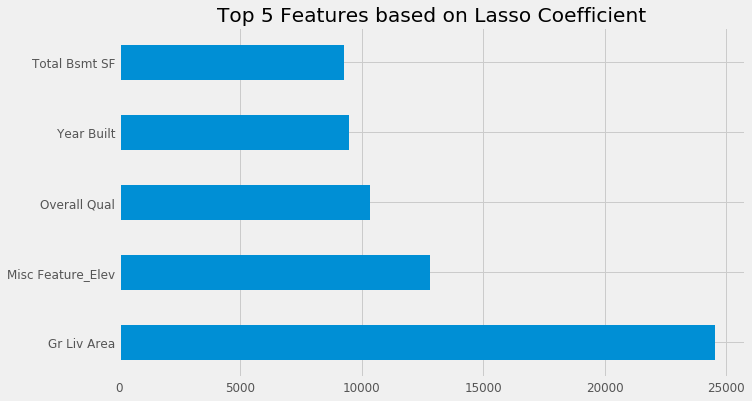

In [304]:
lasso_coef_0 = abs(lasso.coef_)
lasso_coef_0 = pd.DataFrame(lasso_coef_0, index = X_train.columns)
lasso_coef_0 = lasso_coef_0.sort_values(0, ascending = False)
lasso_coef_0.head(6)
# lasso_coef_filt = lasso_coef_0[lasso_coef[0] > 0]
# lasso_coef_filt = lasso_coef_filt.sort_values(0, ascending = False)
lasso_coef_0[:5].plot(kind = "barh", title = "Top 5 Features based on Lasso Coefficient", legend = False,
                         figsize = (10,6), fontsize = 12)

In [27]:
#Score scaled test set (within train data set) against model
score = lasso.score(X_scaled_test, y_test)
score

0.9177023867028858

In [28]:
#Set X and y for test data set; scale X to create predictions.
X_holdout = test[features]
X_holdout_scaled = scaler.transform(X_holdout)
y_preds = lasso.predict(X_holdout_scaled)

In [29]:
#Format for Kaggle submission
df = pd.DataFrame()
my_ids = test["Id"]

df["Id"] = my_ids
df["SalePrice"] = y_preds

df.set_index("Id", inplace = True)
df.head()

,SalePrice
Id,
2658,145152.900834
2718,165908.497445
2414,216809.643994
1989,108936.862792
625,183663.881882


In [30]:
#Write to csv file
df.to_csv("./data/predicts_3.csv")

Model 2 - Add all interaction terms using PolynomialFeatures; Lasso Regularization - Kaggle RSME - 27619.68353

In [32]:
features_1 = [col for col in train if col != "SalePrice"]
X_1 = train[features_1]
y_1 = train["SalePrice"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1)

In [33]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train_1)
X_test_poly = poly.transform(X_test_1)

In [34]:
#Lasso Regularization requires features in X to be scaled
scaler = StandardScaler()
X_scaled_train_1 = scaler.fit_transform(X_train_poly)
X_scaled_test_1 = scaler.transform(X_test_poly)

In [35]:
X_scaled_train_1.shape

(1538, 61425)

In [36]:
%%time
#Instantiate LassoCV and fit model against scaled train set (within train data set)
lasso_1 = LassoCV()
lasso_1.fit(X_scaled_train_1, y_train_1)

CPU times: user 17min 12s, sys: 1min 10s, total: 18min 22s
Wall time: 13min 3s


In [37]:
lasso_cross_1 = cross_val_score(lasso_1, X_scaled_train_1, y_train_1)
print(lasso_cross_1.mean())

0.8258258035432174


In [150]:
print(lasso_cross_1)

[0.91778376 0.62499057 0.93470308]


In [38]:
score_1 = lasso_1.score(X_scaled_test_1, y_test_1)
score_1

0.9332837317198016

In [39]:
X_holdout_1 = test[features_1]
X_holdout_poly_1 = poly.transform(X_holdout_1)
X_holdout_scaled_1 = scaler.transform(X_holdout_poly_1)
y_preds_1 = lasso_1.predict(X_holdout_scaled_1)

In [40]:
df_1 = pd.DataFrame()
my_ids_1 = test["Id"]

df_1["Id"] = my_ids_1
df_1["SalePrice"] = y_preds_1
df_1.head()

,Id,SalePrice
0,2658,145305.411623
1,2718,156803.634434
2,2414,209774.794646
3,1989,109365.213378
4,625,178627.799386


In [41]:
df_1.set_index("Id", inplace = True)
df_1.head()

,SalePrice
Id,
2658,145305.411623
2718,156803.634434
2414,209774.794646
1989,109365.213378
625,178627.799386


In [42]:
#Write to csv file
df_1.to_csv("./data/predicts_5.csv")

In [43]:
lasso_1.alpha_

800.2412496985596

Model 3 (Time Permitting) - Manual feature selection with help of Lasso Regularization

Update: Did not have enough time to do this. But would be interesting to see how it performs against Lasso vs. Ridge Regularization. 

In [105]:
# poly.get_feature_names(X_train_1.columns)

In [214]:
#Print out lasso coefficients and features
lasso_coef = abs(lasso_1.coef_)
lasso_coef = pd.DataFrame(lasso_coef, index = poly.get_feature_names(X_train_1.columns))

lasso_coef_filt = lasso_coef[lasso_coef[0] > 0]
lasso_coef_filt = lasso_coef_filt.sort_values(0, ascending = False)



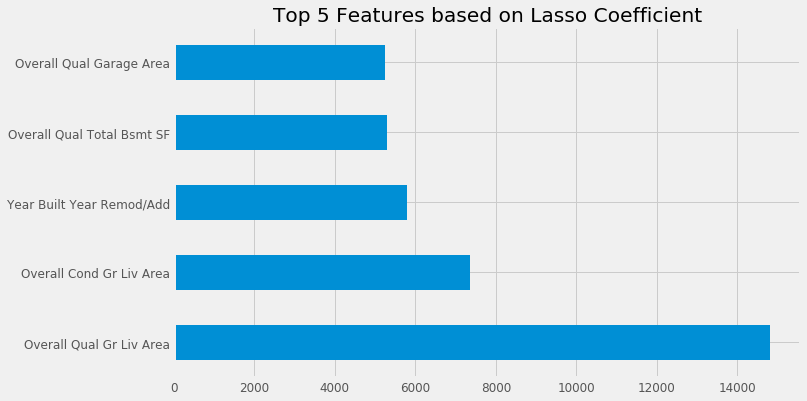

In [218]:
lasso_coef_filt[1:6].plot(kind = "barh", title = "Top 5 Features based on Lasso Coefficient", legend = False,
                         figsize = (10,6), fontsize = 12)

Model 0 - Simple Linear Regression (total_sf) - Kaggle RSME - 55116.72324

Model 01 - Simple Linear Regression (Overall Qual) - Kaggle RSME - 55116.15827

Initially created a column for Total Square Footage that added columns with SF in name together. It did not perform very as well. Initially used this as it had the highest correlation at the time. This feature has since been removed from the dataframe for subsequent Lasso models


In [72]:
train.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Alley_NA,Alley_Pave,...,Bsmt Cond_NA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_TA,Bsmt Cond_Gd,Bsmt Cond_Po,Heating QC_Ex,Heating QC_Fa,Heating QC_TA,Heating QC_Gd,Heating QC_Po,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_TA,Kitchen Qual_Gd,Kitchen Qual_Po,Fireplace Qu_NA,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_TA,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Qual_NA,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_TA,Garage Qual_Gd,Garage Qual_Po,Garage Cond_NA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_TA,Garage Cond_Gd,Garage Cond_Po,Pool QC_NA,Pool QC_Ex,Pool QC_Fa,Pool QC_TA,Pool QC_Gd,total_sf
0,109,533352170,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN
1,544,531379050,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN
2,153,535304180,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN
3,318,916386060,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN
4,255,906425045,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,1,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN


In [135]:
#Get columns that contain SF to add to total SF
total_sf = [col for col in train if "SF" in col]
total_sf = [col for col in total_sf if col != "House Style_SFoyer"]
total_sf

['BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Wood Deck SF',
 'Open Porch SF']

In [136]:
train["total_sf"] = train["Total Bsmt SF"] + train["1st Flr SF"] + train["2nd Flr SF"]

In [137]:
train.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Alley_NA,Alley_Pave,...,Bsmt Cond_NA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_TA,Bsmt Cond_Gd,Bsmt Cond_Po,Heating QC_Ex,Heating QC_Fa,Heating QC_TA,Heating QC_Gd,Heating QC_Po,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_TA,Kitchen Qual_Gd,Kitchen Qual_Po,Fireplace Qu_NA,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_TA,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Qual_NA,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_TA,Garage Qual_Gd,Garage Qual_Po,Garage Cond_NA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_TA,Garage Cond_Gd,Garage Cond_Po,Pool QC_NA,Pool QC_Ex,Pool QC_Fa,Pool QC_TA,Pool QC_Gd,total_sf
0,109,533352170,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2204.0
1,544,531379050,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3035.0
2,153,535304180,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2114.0
3,318,916386060,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1828.0
4,255,906425045,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,1,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2121.0


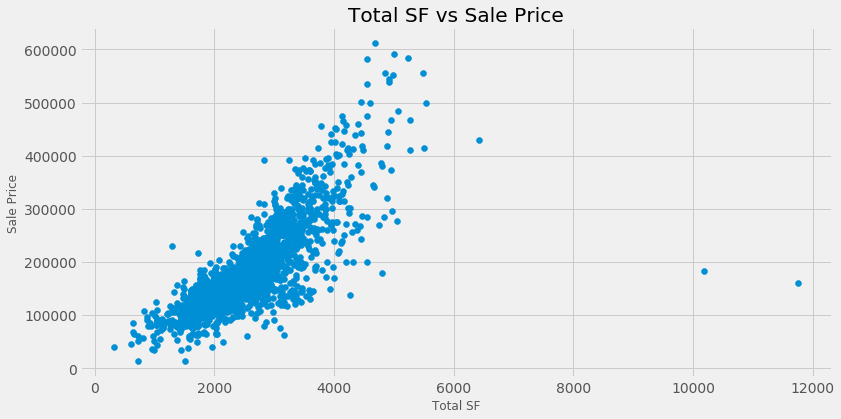

In [207]:
#Scatter plot of total_sf against SalePrice to see correlation
plt.figure(figsize = (12, 6))
plt.title("Total SF vs Sale Price")
plt.ylabel("Sale Price", size = 12)
plt.xlabel("Total SF", size = 12)
plt.scatter(train["total_sf"], train["SalePrice"])

In [81]:
features_0 = ["total_sf"]
X_0 = train[features_0]
y_0 = train["SalePrice"]

In [83]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0,y_0)
linreg = LinearRegression()
scores = cross_val_score(linreg, X_train_0, y_train_0)
print(scores)
print(scores.mean())

[0.67998615 0.49678481 0.68560326]
0.620791403760718


In [84]:
linreg.fit(X_0, y_0)
print(linreg.coef_)
print(linreg.score(X_test_0, y_test_0))

[76.65544642]
0.5422360112153822


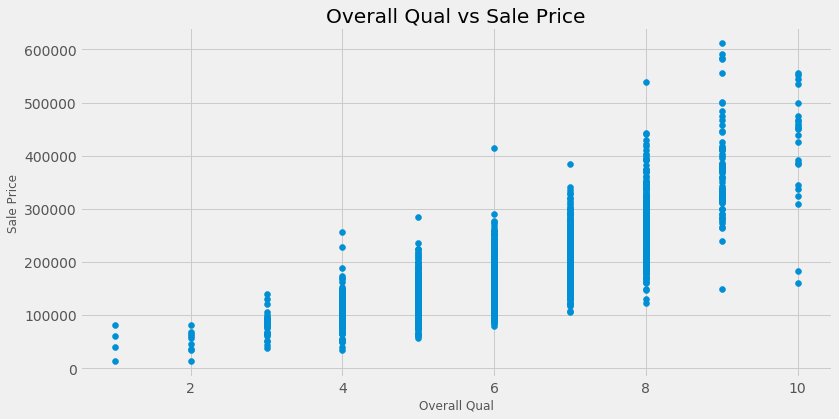

In [302]:
#Overall Qual - another feature that had high Corr
plt.figure(figsize = (12, 6))
plt.title("Overall Qual vs Sale Price")
plt.ylabel("Sale Price", size = 12)
plt.xlabel("Overall Qual", size = 12)
plt.scatter(train["Overall Qual"], train["SalePrice"])

In [102]:
features_01 = ["Overall Qual"]
X_01 = train[features_01]
y_01 = train["SalePrice"]

In [103]:
X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01,y_01)
linreg = LinearRegression()
scores = cross_val_score(linreg, X_train_01, y_train_01)
print(scores)
print(scores.mean())

[0.64483392 0.65870513 0.62804045]
0.6438598347302763


In [104]:
linreg.fit(X_01, y_01)
print(linreg.coef_)
print(linreg.score(X_test_01, y_test_01))

[44467.94759687]
0.6261853672126825


MISC

In [209]:
best_coef = ["Overall Qual Gr Liv Area", "Overall Cond Gr Liv Area", "Year Built Year Remod/Add", "Overall Qual Total Bsmt SF",
            "Overall Qual Garage Area"]
poly_corr = pd.DataFrame(X_train_poly, columns = poly.get_feature_names(X_train_1.columns))
poly_corr["SalePrice"] = train["SalePrice"]
best_coef_target = ["Overall Qual Gr Liv Area", "Overall Cond Gr Liv Area", "Year Built Year Remod/Add", 
                    "Overall Qual Total Bsmt SF","Overall Qual Garage Area", "SalePrice"]                         
coef_df = pd.DataFrame(poly_corr[best_coef_target].corr().loc["SalePrice", :].abs().sort_values(ascending = False))
coef_df

,SalePrice
SalePrice,1.000000
Overall Qual Total Bsmt SF,0.021773
Overall Qual Gr Liv Area,0.015277
Year Built Year Remod/Add,0.014223
Overall Cond Gr Liv Area,0.009903
Overall Qual Garage Area,0.002202


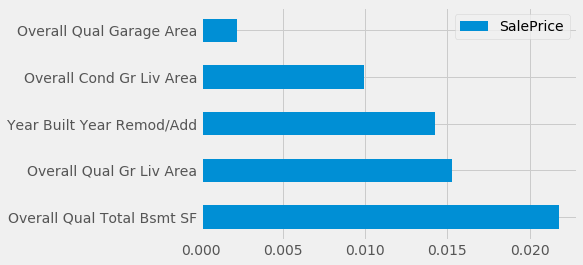

In [211]:
coef_df[1:].plot(kind = "barh")

In [176]:
corr_data = [0.800208, 0.783173, 0.697261, 0.650270, 0.648220]
corr_data_cols = ["Overall Qual", "total_sf", "Gr Liv Area",
                 "Garage Area", "Garage Cars"]

In [179]:
corr_df = pd.DataFrame(corr_data, index = corr_data_cols)
corr_df

,0
Overall Qual,0.800208
total_sf,0.783173
Gr Liv Area,0.697261
Garage Area,0.650270
Garage Cars,0.648220


In [305]:
model_0 = [[0.62, 0.53], [0.84, 0.92], [0.83, 0.93]]

In [307]:
model_0_df = pd.DataFrame(model_0, index = ["Model 1", "Model 2", "Model 3"] , columns = ["Cross_Val_Score", "Test Score"])

In [309]:
model_0_df = model_0_df.T
model_0_df

,Cross_Val_Score,Test Score
Model 1,0.62,0.53
Model 2,0.84,0.92
Model 3,0.83,0.93


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

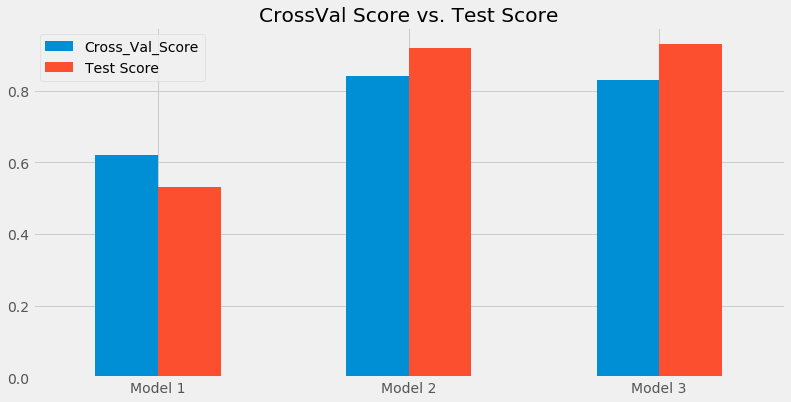

In [319]:
model_0_df.plot(kind = "bar", figsize = (12,6), title = "CrossVal Score vs. Test Score", )
plt.xticks(rotation='horizontal')

In [337]:
(27619-37639)/37639

-0.2662132362708892

In [323]:
meansqerror = [55116,37639,27619]
name = ["Model 1", "Model 2", "Model 3"]

<BarContainer object of 3 artists>

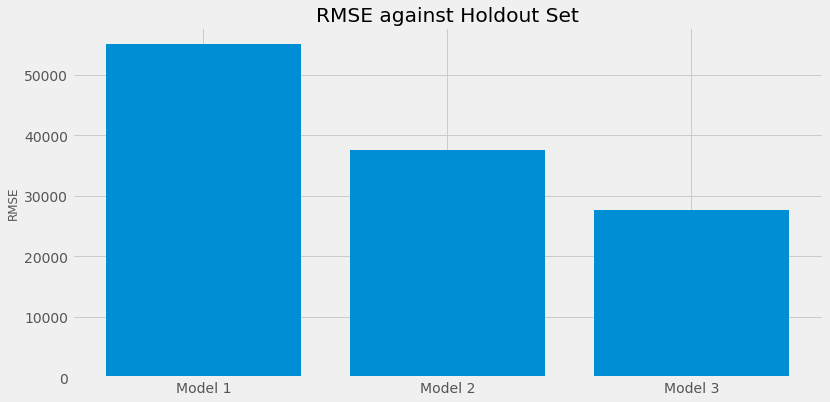

In [325]:
plt.figure(figsize = (12, 6))
plt.title("RMSE against Holdout Set")
plt.ylabel("RMSE", size = 12)
plt.bar(name, meansqerror)

In [327]:
model_1 = [0.62, 0.53]
model_1_df = pd.DataFrame(model_1, index = ["Cross_Val_Score", "Test Score"], columns = ["Model 1"] )

(array([0, 1]), <a list of 2 Text xticklabel objects>)

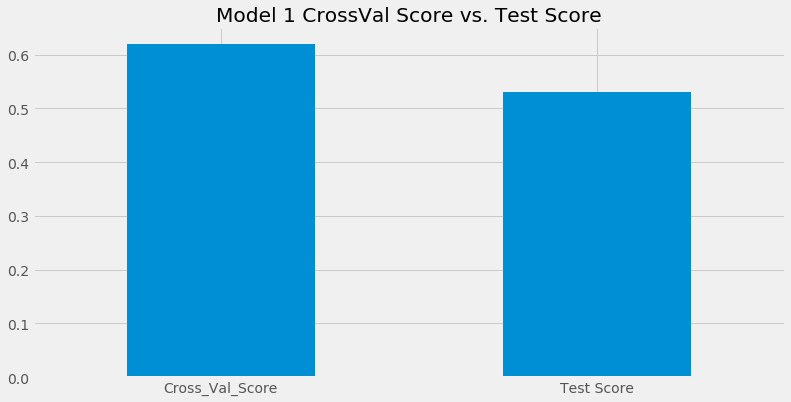

In [331]:
model_1_df.plot(kind = "bar", figsize = (12,6), title = "Model 1 CrossVal Score vs. Test Score", legend = False )
plt.xticks(rotation='horizontal')

In [332]:
model_2 = [0.84, 0.92]
model_2_df = pd.DataFrame(model_2, index = ["Cross_Val_Score", "Test Score"], columns = ["Model 2"] )

(array([0, 1]), <a list of 2 Text xticklabel objects>)

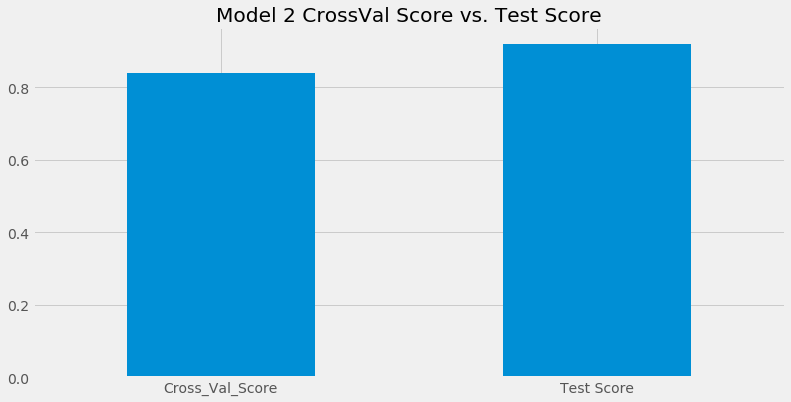

In [333]:
model_2_df.plot(kind = "bar", figsize = (12,6), title = "Model 2 CrossVal Score vs. Test Score", legend = False )
plt.xticks(rotation='horizontal')

In [334]:
model_3 = [0.83, 0.93]
model_3_df = pd.DataFrame(model_3, index = ["Cross_Val_Score", "Test Score"], columns = ["Model 3"] )

(array([0, 1]), <a list of 2 Text xticklabel objects>)

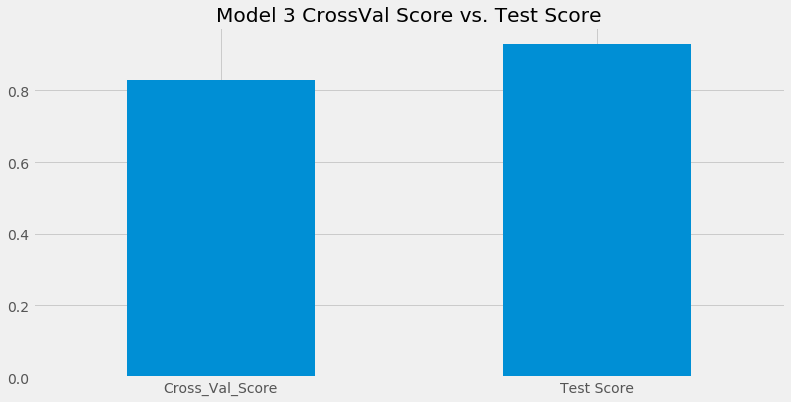

In [336]:
model_3_df.plot(kind = "bar", figsize = (12,6), title = "Model 3 CrossVal Score vs. Test Score", legend = False )
plt.xticks(rotation='horizontal')